# Decision Tree Classifier
# Introduction
The goal of this notebook is to train a decision tree classifier to accurately predict the species of iris given petal and sepal measurements.
# Input
The cleaned data from the data cleaning notebook.
# Output
1. A decision tree classifier that accurately predicts iris species
2. An optimal set of features and hyper parameters.
3. A plot of the decision tree
4. Model accuracy
5. Classification report
6. Confusion Matrix

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Random State Seed
Used for reproducibility   

In [2]:
SEED = 42

## Read in the clean dataset

In [3]:
iris_df = pd.read_csv('data/iris_clean.csv', skipinitialspace = True)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
143,6.7,3.0,5.2,2.3,Iris-virginica
144,6.3,2.5,5.0,1.9,Iris-virginica
145,6.5,3.0,5.2,2.0,Iris-virginica
146,6.2,3.4,5.4,2.3,Iris-virginica


## Fit and Plot helper function
This comes from the scikit-learn MOOC course "Machine Learning in Python with scikit-learn: https://inria.github.io/scikit-learn-mooc/

In [4]:
def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    palette = ['tab:red', 'tab:blue', 'black']
    
    DecisionBoundaryDisplay.from_estimator(
        model,
        data[feature_names],
        response_method='predict',
        cmap='RdBu',
        alpha=0.5,
    )
    sns.scatterplot(
        data=data,
        x=feature_names[0],
        y=feature_names[1],
        hue=target_names,
        palette=palette,
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Cross Validation Grid Search
Find the optimal max depth parameter; train the model using cross validation to find the best model independent of the data split.

Plot the decision boundary.

We want to limit the max depth to prevent over fitting.

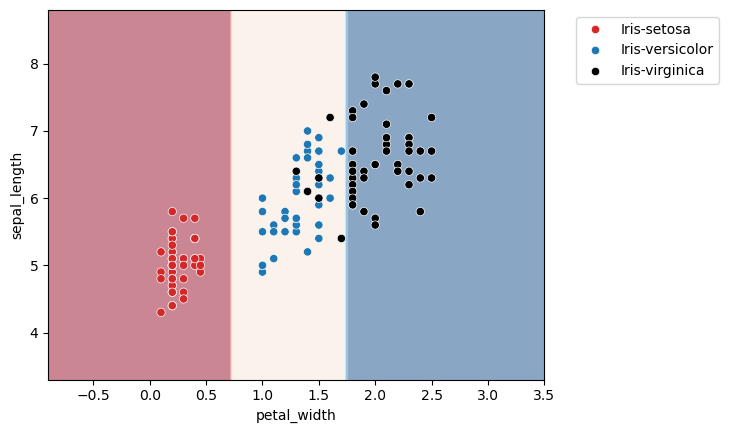

In [5]:
# From the EDA, the combination of petal width and sepal length had a good separation while not being overly correlated.
data_clf_columns = ['petal_width',  'sepal_length']
target_clf_column = 'species'
# The max depth values to test.
param_grid = {'max_depth': np.arange(2, 10, 1)}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
fit_and_plot_classification( clf, iris_df, data_clf_columns, target_clf_column )

## Use the best classifier found by the grid search

In [6]:
model = clf.best_estimator_
model

DecisionTreeClassifier(max_depth=2)

## Split the data into a training and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_df[data_clf_columns], iris_df[target_clf_column], test_size = .20, random_state = SEED)

In [8]:
X_train

,petal_width,sepal_length
136,1.8,6.4
45,0.2,5.1
119,2.3,6.9
27,0.2,5.2
4,0.2,5.0
...,...,...
71,1.5,6.3
106,1.8,7.3
14,0.2,5.8
92,1.0,5.0


In [9]:
X_test

,petal_width,sepal_length
125,1.8,6.2
51,1.5,6.9
139,2.4,6.7
19,0.3,5.1
104,2.1,7.6
12,0.1,4.8
76,1.7,6.7
31,0.4,5.4
81,1.2,5.8
9,0.1,4.9


## The training and testing sets are divided fairly evenly across the species.

In [10]:
y_train.value_counts()

species
Iris-virginica     40
Iris-versicolor    40
Iris-setosa        38
Name: count, dtype: int64

In [11]:
y_test.value_counts()

species
Iris-setosa        11
Iris-versicolor    10
Iris-virginica      9
Name: count, dtype: int64

## Train the model

In [12]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

## Plot the Decision Tree
Inspecting the plot the iris species can be determined completely using the petal width.

Looking back at the EDA pair plot one can see that the species are the most separated for petal width.

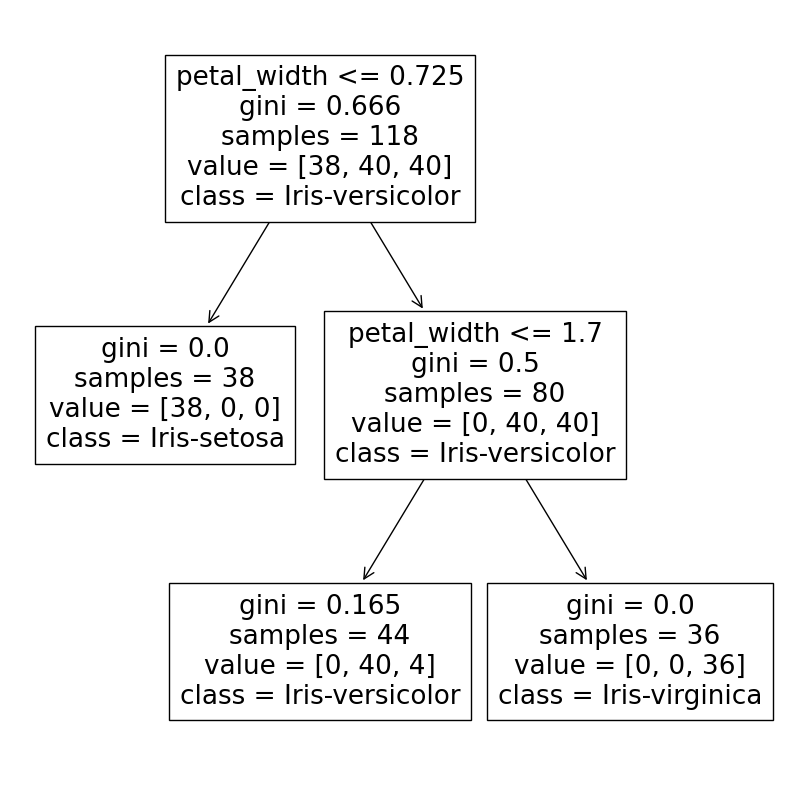

In [13]:
_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(model, ax=ax, feature_names=data_clf_columns, class_names = iris_df[target_clf_column].unique())

## Model Accuracy
Accuracy is a valid metric for this dataset since the species distributions are fairly even.

In [14]:
predictions = model.predict(X_test)
print(f'Decision Tree Accuracy = {accuracy_score(y_test, predictions)}')

Decision Tree Accuracy = 0.9


## Classification Report
Setosa has perfect precision, recall and f1 scores.  This is evident in the EDA where there is no overlap in the petal width for setosa.

Versicolor and Virginica have some overlap for all the features in the dataset so given the data available it is not possible to perfectly predict those two species.  It may be possible with further or different data cleaning to get better results or it maybe that there is overlap between the two species.

In [15]:
print(classification_report(y_test, predictions, target_names=iris_df[target_clf_column].unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.80      0.89      0.84         9

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.89        30
   weighted avg       0.90      0.90      0.90        30



## Confusion Matrix

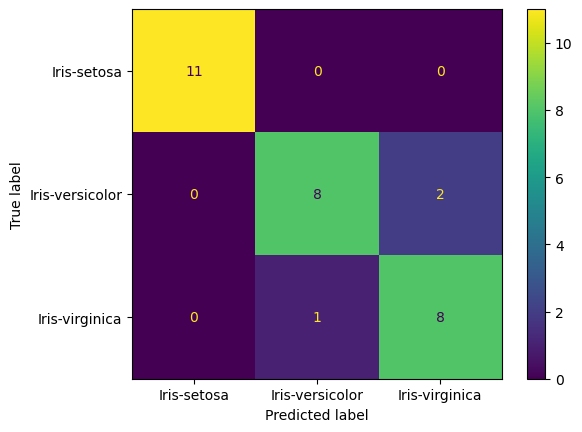

In [16]:
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=iris_df[target_clf_column].unique());
cmd.plot();

## 

## Petal Length
The EDA shows a good separation of species.

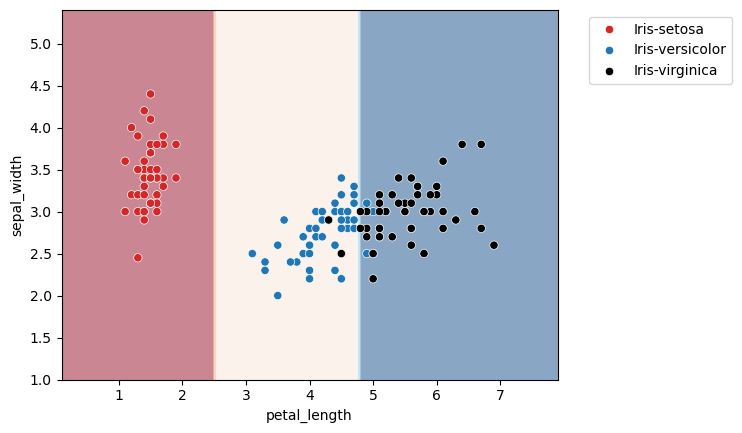

In [17]:
# From the EDA, the combination of petal length and sepal width had a good separation while not being overly correlated.
data_clf_columns = ['petal_length',  'sepal_width']
target_clf_column = 'species'
# The max depth values to test.
param_grid = {'max_depth': np.arange(2, 10, 1)}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
fit_and_plot_classification( clf, iris_df, data_clf_columns, target_clf_column )

In [18]:
model = clf.best_estimator_
model

DecisionTreeClassifier(max_depth=2)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris_df[data_clf_columns], iris_df[target_clf_column], test_size = .20, random_state = SEED)
X_train

,petal_length,sepal_width
136,5.5,3.1
45,1.6,3.8
119,5.7,3.2
27,1.5,3.5
4,1.4,3.6
...,...,...
71,4.9,2.5
106,6.3,2.9
14,1.2,4.0
92,3.3,2.3


In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

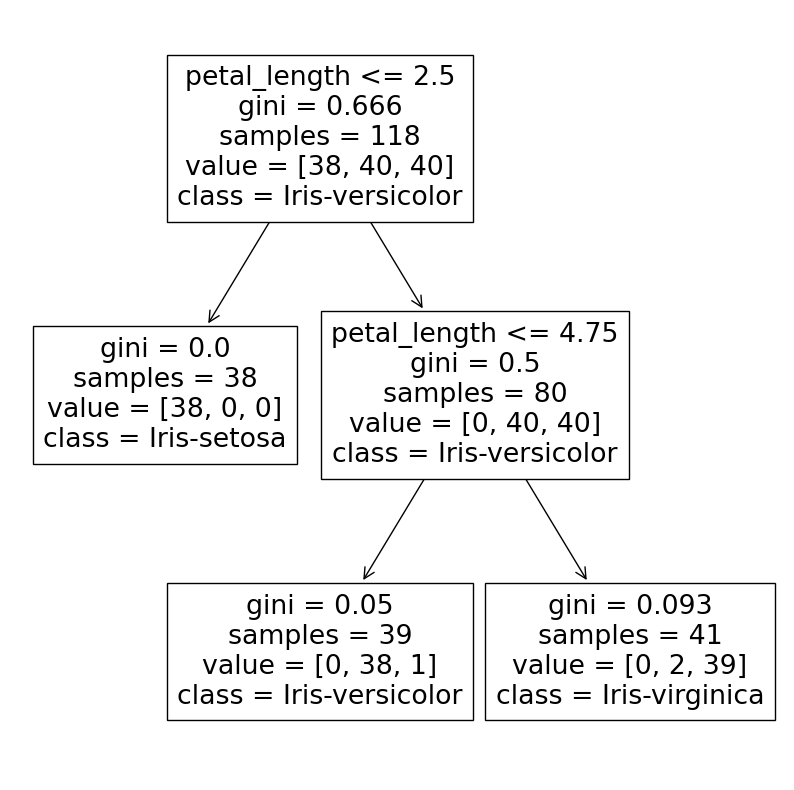

In [21]:
_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(model, ax=ax, feature_names=data_clf_columns, class_names = iris_df[target_clf_column].unique())

## Conclusion
Petal Width is a better determinal of species than Petal Length

In [22]:
predictions = model.predict(X_test)
print(f'Decision Tree Accuracy = {accuracy_score(y_test, predictions)}')

Decision Tree Accuracy = 0.8333333333333334


In [23]:
print(classification_report(y_test, predictions, target_names=iris_df[target_clf_column].unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.86      0.60      0.71        10
 Iris-virginica       0.67      0.89      0.76         9

       accuracy                           0.83        30
      macro avg       0.84      0.83      0.82        30
   weighted avg       0.85      0.83      0.83        30



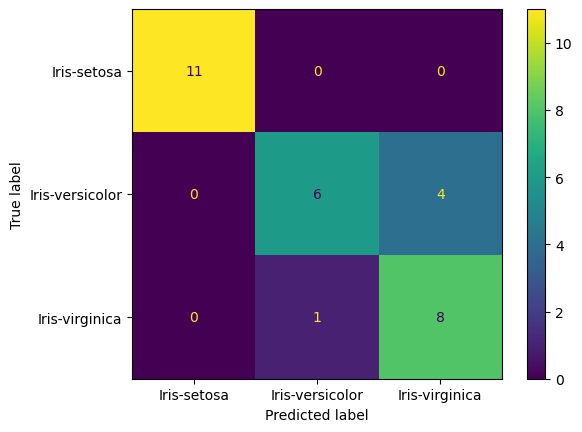

In [24]:
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=iris_df[target_clf_column].unique());
cmd.plot();